In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words =500)

In [3]:
x_train.shape, y_train.shape

((25000,), (25000,))

In [4]:
len(x_train[1]), len(x_train[0])

(189, 218)

In [5]:
type(x_train[0])

list

In [6]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 2,
 2,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 2,
 112,
 50,
 2,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 2,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 2,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 2,
 17,
 12,
 16,
 2,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 2,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 2,
 36,
 71,
 43,
 2,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 38,
 2,
 88,
 12,
 16,


In [7]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [8]:
# 타깃 데이터 출력
# 0 : 부정, 1 : 긍정
print(y_train[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [9]:
x_train, x_val, y_train, y_val =train_test_split(x_train, y_train,  random_state = 5, test_size = 0.2,
                                                  stratify = y_train)

### 각 리뷰의 길이 확인

- 각 리뷰의 길이를 넘파이 배열로 담아 평균 리뷰 길이, 길이 최솟값, 길이 최댓값을 확인

In [10]:
lengths = np.array([len(x) for x in x_train])

In [11]:
lengths

array([119, 220, 240, ..., 337, 146, 112])

In [12]:
x_train.shape

(20000,)

In [13]:
# 길이 평균값과 중간값
print(np.mean(lengths), np.median(lengths), np.min(lengths), np.max(lengths))

237.7211 178.0 11 2494


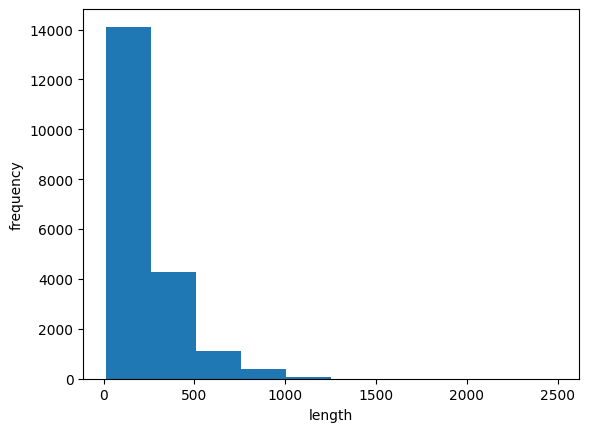

In [16]:
plt.figure()


plt.hist(lengths)
plt.xlabel("length")
plt.ylabel("frequency")
plt.show()


In [17]:
train_seq = pad_sequences(x_train, maxlen = 100)

In [19]:
print(train_seq.shape)

(20000, 100)


In [20]:
print(train_seq[0])

[ 12  16   2  34   2   2   2 157  13   2   2   4   2  69 427  57   2  24
  18   6 333 100  13 264  15  50  16 233   2  74   2 200  98   4  65  43
 161   2 283   2   8  15   2   2   2   7   2   5  35   2   2 114  15   2
   2   2   5   2 188   2   6 147   2   2   2   2 139 238  30   2  18 148
   2  49   2   2  21   2  14   9   6   2 437   7  58  61   2  17  13 296
   4  20  16  15   2  28  77 128   2   2]


In [23]:
print(train_seq[0][-100:])

[ 12  16   2  34   2   2   2 157  13   2   2   4   2  69 427  57   2  24
  18   6 333 100  13 264  15  50  16 233   2  74   2 200  98   4  65  43
 161   2 283   2   8  15   2   2   2   7   2   5  35   2   2 114  15   2
   2   2   5   2 188   2   6 147   2   2   2   2 139 238  30   2  18 148
   2  49   2   2  21   2  14   9   6   2 437   7  58  61   2  17  13 296
   4  20  16  15   2  28  77 128   2   2]


In [24]:
print(train_seq[25])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   1   2 167   2   2   2 453  23  22  15   2  19   4 118   7
   2   2 312 453   9 258  11   4   2   5   2  11 162   2   2 270 449 422
  92   2   2  70   2  44   2   2   5   2   4  32 323 177   2   2   2   2
   2   2   2   2   2   2   2   5   2   2]


In [25]:
val_seq = pad_sequences(x_val, maxlen = 100)